# COVID-19 Data Analysis

## Problem Statement

Analyze the provided COVID-19 dataset to understand the global spread, impact, and vaccination efforts, and identify key trends, patterns, and anomalies in the data.

## Approach

The analysis will follow a standard data science workflow:

1.  **Data Loading:** Load the dataset into a pandas DataFrame.
2.  **Data Inspection:** Understand the structure, columns, and initial characteristics of the data.
3.  **Data Cleaning:** Handle missing values, inconsistent data types, and irrelevant entries to prepare the data for analysis.
4.  **Exploratory Data Analysis (EDA):** Visualize key trends, distributions, and relationships within the data.
5.  **Correlation Analysis:** Examine the relationships between different COVID-19 metrics.
6.  **Insights & Reporting:** Summarize the key findings, anomalies, and insights from the analysis.

## Table of Contents

1.  [Data Loading](#Data-Loading)
2.  [Data Inspection](#Data-Inspection)
3.  [Data Cleaning](#Data-Cleaning)
4.  [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5.  [Correlation Analysis](#Correlation-Analysis)
6.  [Insights & Reporting](#Insights-&-Reporting)

*   Initial imports for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.head()


Rows: 523599
Columns: 61


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [5]:
print(df.columns.tolist())


['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 

In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing.head(10))

Missing Values:
 human_development_index                    523599
weekly_icu_admissions                      512606
weekly_icu_admissions_per_million          512606
excess_mortality_cumulative_per_million    509961
excess_mortality                           509927
excess_mortality_cumulative                509927
excess_mortality_cumulative_absolute       509927
weekly_hosp_admissions_per_million         499102
weekly_hosp_admissions                     499102
icu_patients                               484483
dtype: int64


In [18]:
keep_cols = [
    "country", "continent", "date", "population",
    "total_cases", "new_cases", "total_deaths", "new_deaths",
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated",
    "stringency_index"
]


# Keep only available columns
df_core = df[[c for c in keep_cols if c in df.columns]].copy()

In [19]:
df_core['date'] = pd.to_datetime(df_core['date'], errors='coerce')

In [14]:
df_core.columns

Index(['continent', 'date', 'population', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'stringency_index'],
      dtype='object')

In [21]:
df_core.isnull().sum()

,0
country,0
continent,39392
date,0
population,16958
total_cases,14145
new_cases,17315
total_deaths,14145
new_deaths,16472
total_vaccinations,440377
people_vaccinated,444588


In [22]:
df_core = df_core.dropna(subset=['country', 'date'])

In [23]:
df_core = df_core.dropna(subset=['population'])

In [24]:
# Fill missing continent names with "Unknown"
df_core['continent'] = df_core['continent'].fillna("Unknown")

# Sort by country & date
df_core = df_core.sort_values(['country', 'date']).reset_index(drop=True)


In [25]:
# Forward-fill cumulative metrics per country
cum_cols = ["total_cases", "total_deaths", "total_vaccinations",
            "people_vaccinated", "people_fully_vaccinated"]

for col in cum_cols:
    if col in df_core.columns:
        df_core[col] = df_core.groupby('country')[col].ffill()

# Recompute new cases and deaths if missing
if 'total_cases' in df_core.columns:
    df_core['new_cases'] = df_core.groupby('country')['total_cases'].diff().fillna(0)

if 'total_deaths' in df_core.columns:
    df_core['new_deaths'] = df_core.groupby('country')['total_deaths'].diff().fillna(0)

# Create per-million metrics
df_core['total_cases_per_million'] = (df_core['total_cases'] / df_core['population']) * 1e6
df_core['total_deaths_per_million'] = (df_core['total_deaths'] / df_core['population']) * 1e6
df_core['total_vaccinations_per_million'] = (df_core['total_vaccinations'] / df_core['population']) * 1e6

# Final dataset overview
print("✅ Cleaned dataset ready!")
print("Rows:", df_core.shape[0])
print("Columns:", df_core.shape[1])
print(df_core.isnull().sum())

# Preview cleaned dataset
df_core.head()

✅ Cleaned dataset ready!
Rows: 506641
Columns: 15
country                                0
continent                              0
date                                   0
population                             0
total_cases                         6022
new_cases                              0
total_deaths                        6022
new_deaths                             0
total_vaccinations                133676
people_vaccinated                 134362
people_fully_vaccinated           142138
stringency_index                  303881
total_cases_per_million             6022
total_deaths_per_million            6022
total_vaccinations_per_million    133676
dtype: int64


,country,continent,date,population,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,total_cases_per_million,total_deaths_per_million,total_vaccinations_per_million
0,Afghanistan,Asia,2020-01-01,40578801.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Afghanistan,Asia,2020-01-02,40578801.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Afghanistan,Asia,2020-01-03,40578801.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Afghanistan,Asia,2020-01-04,40578801.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4,Afghanistan,Asia,2020-01-05,40578801.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN


In [26]:
# Check missing values sorted descending
missing_summary = df_core.isnull().sum().sort_values(ascending=False)
print(missing_summary)

# Also check percentage of missing values per column
missing_pct = (df_core.isnull().sum() / len(df_core)) * 100
print("\nMissing Percentage:\n", missing_pct.sort_values(ascending=False))


stringency_index                  303881
people_fully_vaccinated           142138
people_vaccinated                 134362
total_vaccinations                133676
total_vaccinations_per_million    133676
total_deaths                        6022
total_cases                         6022
total_deaths_per_million            6022
total_cases_per_million             6022
new_cases                              0
date                                   0
country                                0
population                             0
continent                              0
new_deaths                             0
dtype: int64

Missing Percentage:
 stringency_index                  59.979552
people_fully_vaccinated           28.054974
people_vaccinated                 26.520159
total_vaccinations                26.384758
total_vaccinations_per_million    26.384758
total_deaths                       1.188613
total_cases                        1.188613
total_deaths_per_million           1.18861

In [27]:
vacc_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

df_core[vacc_cols] = df_core[vacc_cols].fillna(0)


In [29]:
vacc_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

df_core[vacc_cols] = df_core[vacc_cols].fillna(0)


In [30]:
df_core[['total_cases', 'total_deaths']] = (
    df_core.groupby('country')[['total_cases', 'total_deaths']].ffill()
)


In [31]:
df_core['total_cases_per_million'] = (df_core['total_cases'] / df_core['population']) * 1e6
df_core['total_deaths_per_million'] = (df_core['total_deaths'] / df_core['population']) * 1e6
df_core['total_vaccinations_per_million'] = (df_core['total_vaccinations'] / df_core['population']) * 1e6


In [32]:
print("Remaining missing values:\n")
print(df_core.isnull().sum().sort_values(ascending=False))


Remaining missing values:

stringency_index                  303881
total_deaths                        6022
total_cases                         6022
total_cases_per_million             6022
total_deaths_per_million            6022
date                                   0
country                                0
new_cases                              0
population                             0
continent                              0
new_deaths                             0
people_fully_vaccinated                0
people_vaccinated                      0
total_vaccinations                     0
total_vaccinations_per_million         0
dtype: int64


In [36]:
# Fill missing totals safely using transform (keeps original index)
df_core['total_cases'] = df_core.groupby('country')['total_cases'].transform(lambda x: x.fillna(0))
df_core['total_deaths'] = df_core.groupby('country')['total_deaths'].transform(lambda x: x.fillna(0))

# Recompute per-million metrics after filling
df_core['total_cases_per_million'] = (df_core['total_cases'] / df_core['population']) * 1e6
df_core['total_deaths_per_million'] = (df_core['total_deaths'] / df_core['population']) * 1e6

# Check missing values again
print(df_core[['total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million']].isnull().sum())


total_cases                 0
total_deaths                0
total_cases_per_million     0
total_deaths_per_million    0
dtype: int64


In [42]:
# List of unwanted aggregate entries
non_countries = [
    'Africa', 'Asia', 'Europe', 'European Union (27)',
    'Oceania', 'South America', 'North America',
    'High-income countries', 'Low-income countries',
    'Lower-middle-income countries', 'Upper-middle-income countries',
    'World'
]

# Remove them
df_core = df_core[~df_core['country'].isin(non_countries)].reset_index(drop=True)

# Check unique country count
print("Number of countries after cleanup:", df_core['country'].nunique())
print("Example countries:", df_core['country'].unique()[:20])


Number of countries after cleanup: 237
Example countries: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium']


In [43]:
sample_countries = ['Kenya', 'United States', 'India']

for country in sample_countries:
    print(f"\n===== {country} =====")
    display(df_core[df_core['country'] == country][
        ['date', 'total_cases', 'total_deaths', 'total_vaccinations']
    ].tail(5))



===== Kenya =====


,date,total_cases,total_deaths,total_vaccinations
224750,2025-08-06,344137.0,5689.0,23750432.0
224751,2025-08-07,344137.0,5689.0,23750432.0
224752,2025-08-08,344137.0,5689.0,23750432.0
224753,2025-08-09,344137.0,5689.0,23750432.0
224754,2025-08-10,344137.0,5689.0,23750432.0



===== United States =====


,date,total_cases,total_deaths,total_vaccinations
459540,2025-11-30,103436829.0,1226351.0,676728770.0
459541,2025-12-07,103436829.0,1226351.0,676728770.0
459542,2025-12-14,103436829.0,1226351.0,676728770.0
459543,2025-12-21,103436829.0,1226351.0,676728770.0
459544,2025-12-28,103436829.0,1226351.0,676728770.0



===== India =====


,date,total_cases,total_deaths,total_vaccinations
198019,2025-08-06,45055934.0,533837.0,2.206868e+09
198020,2025-08-07,45055945.0,533837.0,2.206868e+09
198021,2025-08-08,45055949.0,533837.0,2.206868e+09
198022,2025-08-09,45055954.0,533837.0,2.206868e+09
198023,2025-08-10,45055954.0,533837.0,2.206868e+09


**Exploratory Data Analysis**

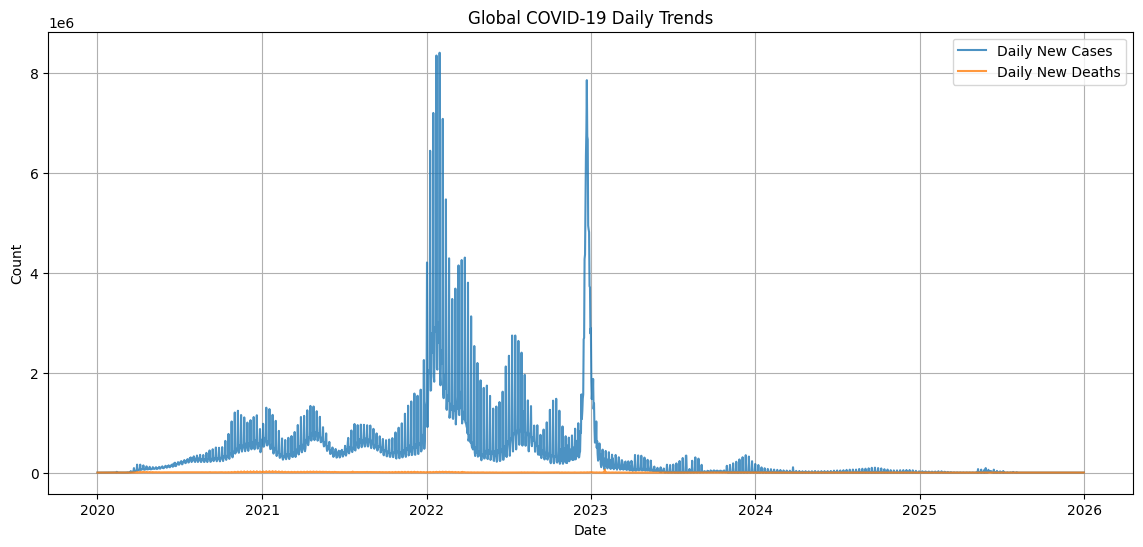

Highest daily new cases: 8401906.0
Highest daily new deaths: 57167.0


In [44]:

global_trend = df_core.groupby('date', as_index=False)[['new_cases', 'new_deaths']].sum()

# Plot daily new cases
plt.figure(figsize=(14,6))
plt.plot(global_trend['date'], global_trend['new_cases'], label='Daily New Cases', alpha=0.8)
plt.plot(global_trend['date'], global_trend['new_deaths'], label='Daily New Deaths', alpha=0.8)
plt.title('Global COVID-19 Daily Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Check peaks
print("Highest daily new cases:", global_trend['new_cases'].max())
print("Highest daily new deaths:", global_trend['new_deaths'].max())


In [47]:
latest_df = (
    df_core.sort_values('date')
    .groupby('country')
    .tail(1)
    .sort_values('total_cases', ascending=False)
    .reset_index(drop=True)
)

# Preview cleaned latest data
latest_df[['country', 'date', 'total_cases', 'total_deaths', 'total_vaccinations']].head(15)


,country,date,total_cases,total_deaths,total_vaccinations
0,United States,2025-12-28,103436829.0,1226351.0,6.767288e+08
1,China,2025-08-10,99381761.0,122398.0,3.516881e+09
2,India,2025-08-10,45055954.0,533837.0,2.206868e+09
3,France,2025-12-28,39042805.0,168162.0,1.580601e+08
4,Germany,2025-12-28,38437875.0,174979.0,1.932415e+08
5,Brazil,2025-12-31,37770150.0,703051.0,5.162371e+08
6,South Korea,2025-12-28,34571873.0,35934.0,1.296478e+08
7,Japan,2025-12-31,33803572.0,74694.0,4.333566e+08
8,Italy,2025-12-28,26968605.0,198523.0,1.503215e+08
9,United Kingdom,2025-12-28,25064716.0,232112.0,1.512488e+08


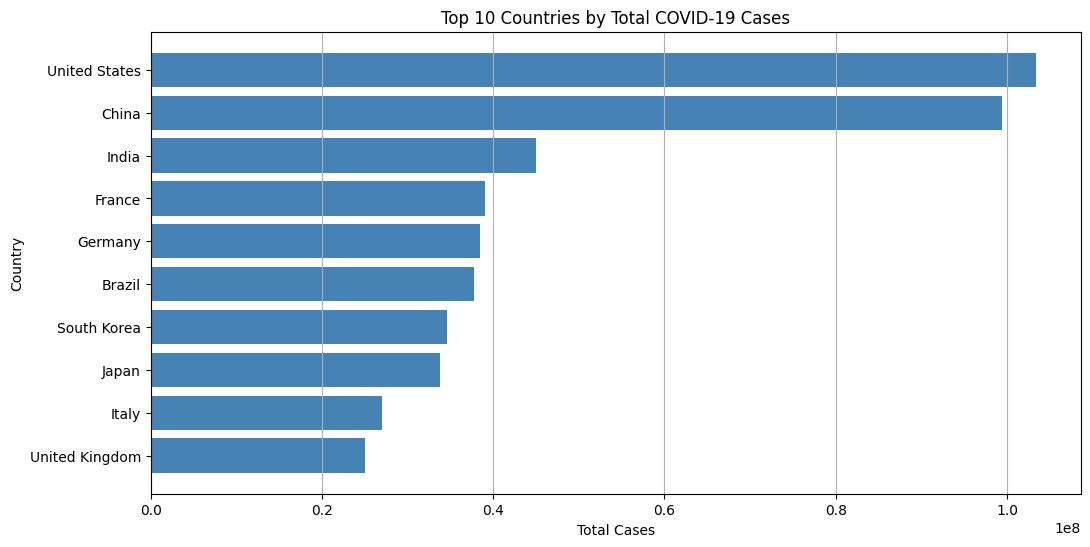

In [48]:
top_cases = latest_df.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_cases['country'], top_cases['total_cases'], color='steelblue')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


In [49]:
# Select countries of interest
focus_countries = ['Kenya', 'United States', 'India']

# Filter dataset
df_focus = df_core[df_core['country'].isin(focus_countries)]

# Quick preview
df_focus[['country', 'date', 'total_cases', 'total_deaths', 'total_vaccinations']].head(10)


,country,date,total_cases,total_deaths,total_vaccinations
195975,India,2020-01-01,0.0,0.0,0.0
195976,India,2020-01-02,0.0,0.0,0.0
195977,India,2020-01-03,0.0,0.0,0.0
195978,India,2020-01-04,0.0,0.0,0.0
195979,India,2020-01-05,0.0,0.0,0.0
195980,India,2020-01-06,0.0,0.0,0.0
195981,India,2020-01-07,0.0,0.0,0.0
195982,India,2020-01-08,0.0,0.0,0.0
195983,India,2020-01-09,0.0,0.0,0.0
195984,India,2020-01-10,0.0,0.0,0.0


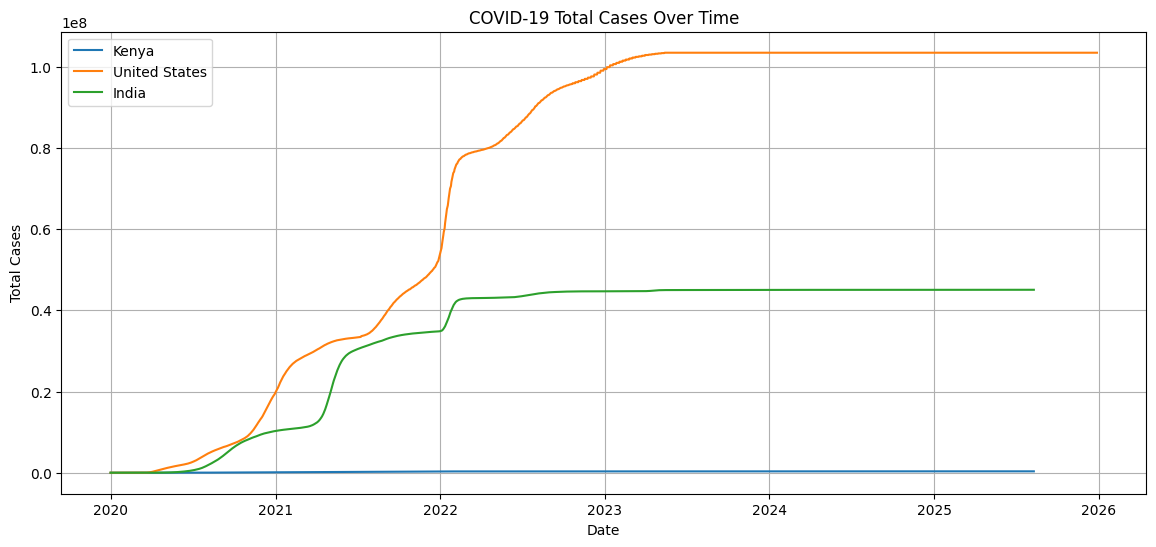

In [50]:


plt.figure(figsize=(14,6))
for country in focus_countries:
    country_data = df_focus[df_focus['country'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('COVID-19 Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


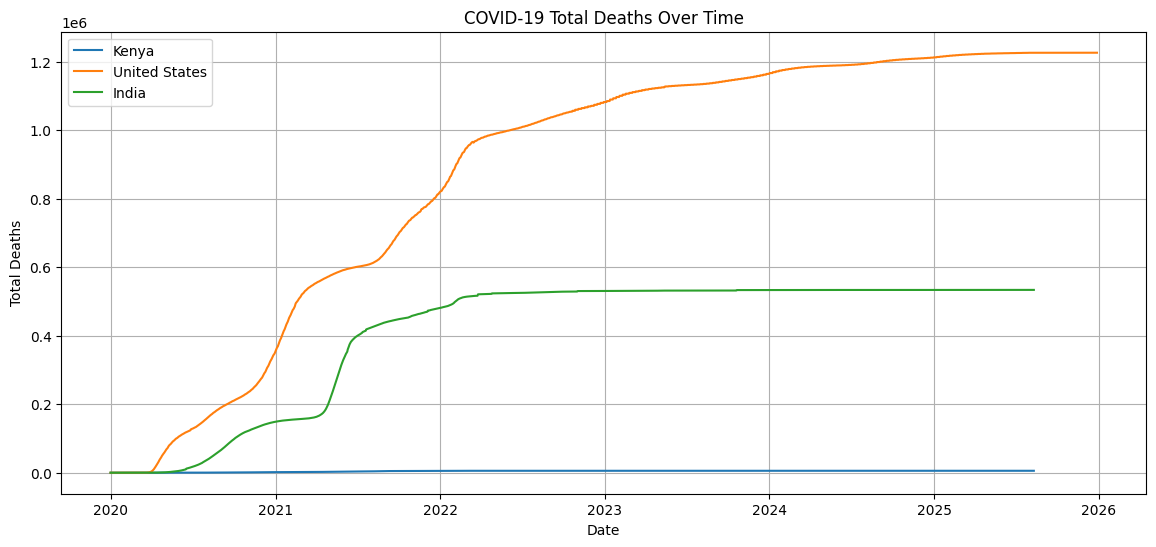

In [51]:
plt.figure(figsize=(14,6))
for country in focus_countries:
    country_data = df_focus[df_focus['country'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('COVID-19 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


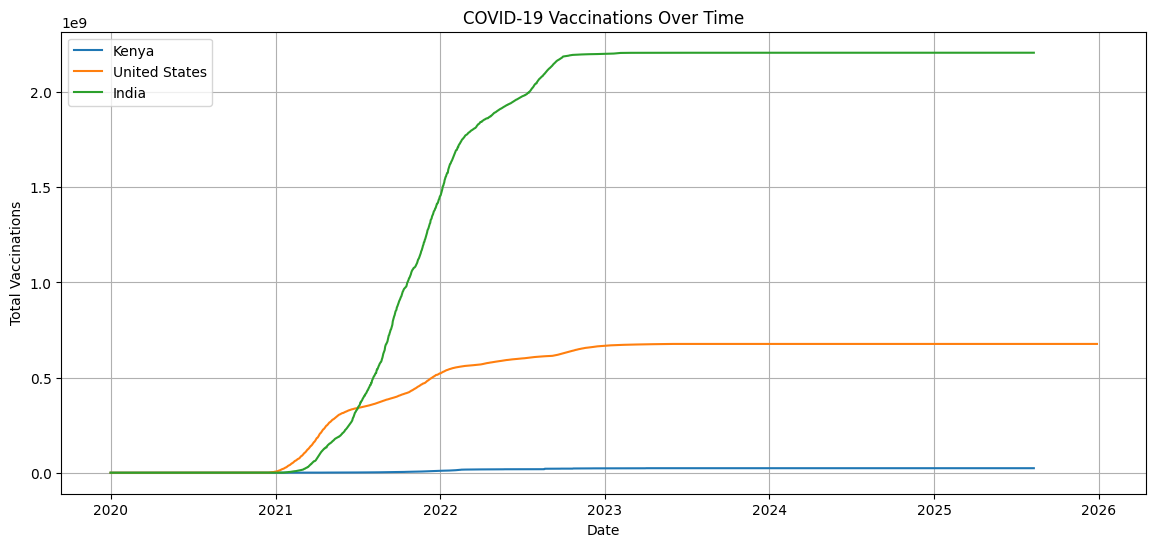

In [52]:
plt.figure(figsize=(14,6))
for country in focus_countries:
    country_data = df_focus[df_focus['country'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
latest_focus = (
    df_focus.sort_values('date')
    .groupby('country')
    .tail(1)
    [['country', 'total_cases', 'total_deaths', 'total_vaccinations', 'population']]
)

# Calculate % vaccinated
latest_focus['vaccinated_pct'] = (latest_focus['total_vaccinations'] / latest_focus['population']) * 100

print("Latest COVID-19 Summary for Focus Countries:")
display(latest_focus)


Latest COVID-19 Summary for Focus Countries:


,country,total_cases,total_deaths,total_vaccinations,population,vaccinated_pct
224754,Kenya,344137.0,5689.0,2.375043e+07,5.425240e+07,43.777658
198023,India,45055954.0,533837.0,2.206868e+09,1.425423e+09,154.821955
459544,United States,103436829.0,1226351.0,6.767288e+08,3.415340e+08,198.143897


In [54]:
# Get the latest available data per country
latest_vacc = (
    df_core.sort_values('date')
    .groupby('country')
    .tail(1)
    .reset_index(drop=True)
)

# Remove countries with missing vaccination data
latest_vacc = latest_vacc[latest_vacc['total_vaccinations'].notna()]

# Calculate % vaccinated
latest_vacc['vaccinated_pct'] = (latest_vacc['total_vaccinations'] / latest_vacc['population']) * 100

# Sort by % vaccinated
latest_vacc = latest_vacc.sort_values('vaccinated_pct', ascending=False)

# Preview
latest_vacc[['country', 'total_vaccinations', 'population', 'vaccinated_pct']].head(10)


,country,total_vaccinations,population,vaccinated_pct
232,Cuba,45995748.0,11059772.0,415.883329
189,Gibraltar,132810.0,37590.0,353.312051
228,Japan,433356600.0,124997534.0,346.692120
122,Chile,66864900.0,19552984.0,341.967753
193,Taiwan,68158990.0,23420051.0,291.028359
181,Brunei,1293100.0,455326.0,283.994325
224,Hong Kong,21012392.0,7465860.0,281.446371
26,Guernsey,178525.0,63698.0,280.267826
100,Cambodia,47826644.0,17201662.0,278.035018
107,Cook Islands,40854.0,14706.0,277.804978


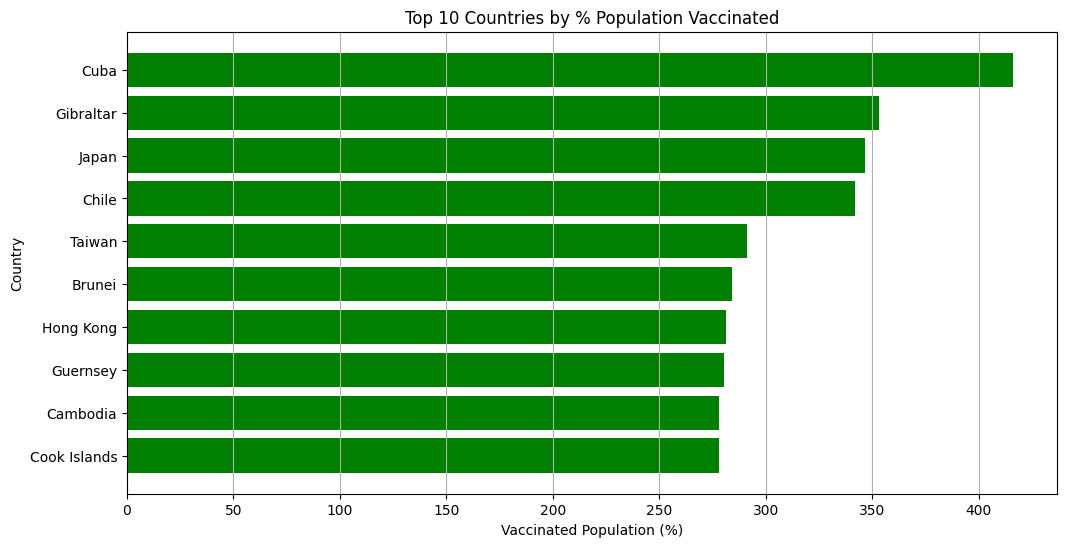

In [55]:
top_vacc_pct = latest_vacc.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_vacc_pct['country'], top_vacc_pct['vaccinated_pct'], color='green')
plt.title('Top 10 Countries by % Population Vaccinated')
plt.xlabel('Vaccinated Population (%)')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


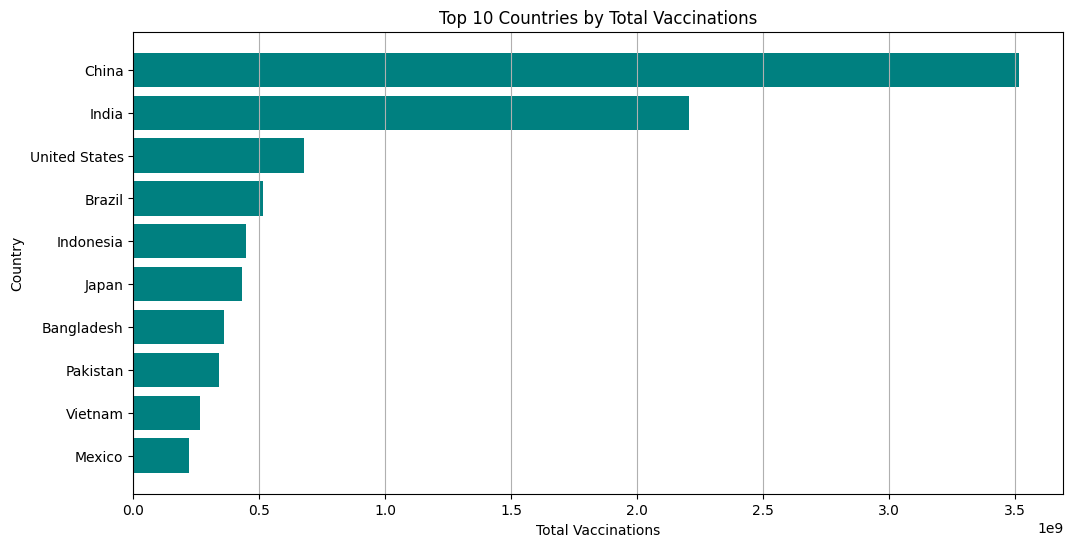

In [56]:
top_vacc_total = latest_vacc.sort_values('total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(top_vacc_total['country'], top_vacc_total['total_vaccinations'], color='teal')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


In [57]:
focus_countries = ['Kenya', 'United States', 'India']

focus_vacc = latest_vacc[latest_vacc['country'].isin(focus_countries)][
    ['country', 'total_vaccinations', 'population', 'vaccinated_pct']
]

print("Vaccination Status for Focus Countries:")
display(focus_vacc)


Vaccination Status for Focus Countries:


,country,total_vaccinations,population,vaccinated_pct
162,United States,6.767288e+08,3.415340e+08,198.143897
17,India,2.206868e+09,1.425423e+09,154.821955
69,Kenya,2.375043e+07,5.425240e+07,43.777658


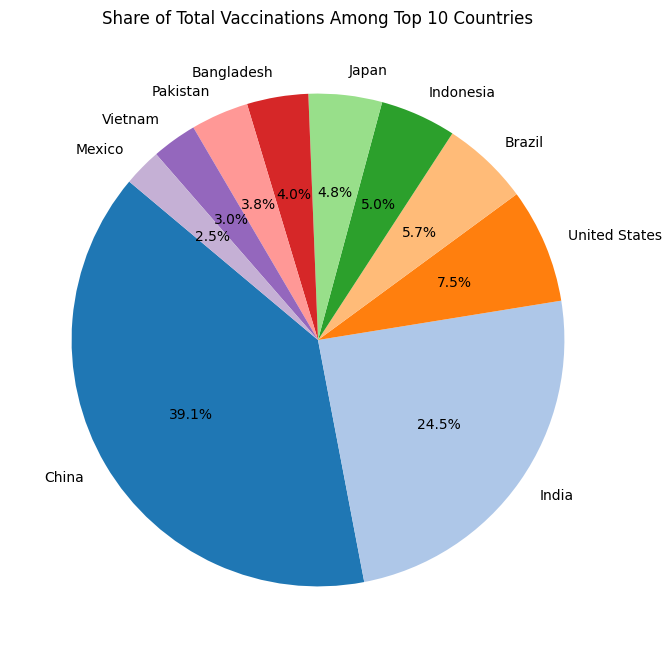

In [58]:
# Top 10 countries share of total vaccinations
top_share = latest_vacc.sort_values('total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(top_share['total_vaccinations'], labels=top_share['country'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Share of Total Vaccinations Among Top 10 Countries')
plt.show()


In [59]:
# Use the latest available data per country
corr_df = (
    df_core.sort_values('date')
    .groupby('country')
    .tail(1)
    .reset_index(drop=True)
)

# Keep only relevant numeric columns
corr_cols = [
    'total_cases', 'total_deaths', 'total_vaccinations',
    'population', 'stringency_index'
]

corr_df = corr_df[corr_cols]

# Drop rows with missing values for clean analysis
corr_df = corr_df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

corr_df.head()


,total_cases,total_deaths,total_vaccinations,population,stringency_index
0,0.0,0.0,0.0,568702.0,NaN
1,0.0,0.0,25263932.0,30394949.0,NaN
2,107487.0,1937.0,27819132.0,35634984.0,NaN
3,52287.0,419.0,0.0,165135.0,NaN
4,66391.0,161.0,266953.0,103444.0,NaN


In [60]:
# Calculate Pearson correlation
corr_matrix = corr_df.corr(method='pearson')
print(corr_matrix)


                    total_cases  total_deaths  total_vaccinations  population  \
total_cases            1.000000      0.766834            0.751366    0.694355   
total_deaths           0.766834      1.000000            0.418791    0.456472   
total_vaccinations     0.751366      0.418791            1.000000    0.966726   
population             0.694355      0.456472            0.966726    1.000000   
stringency_index            NaN           NaN                 NaN         NaN   

                    stringency_index  
total_cases                      NaN  
total_deaths                     NaN  
total_vaccinations               NaN  
population                       NaN  
stringency_index                 NaN  


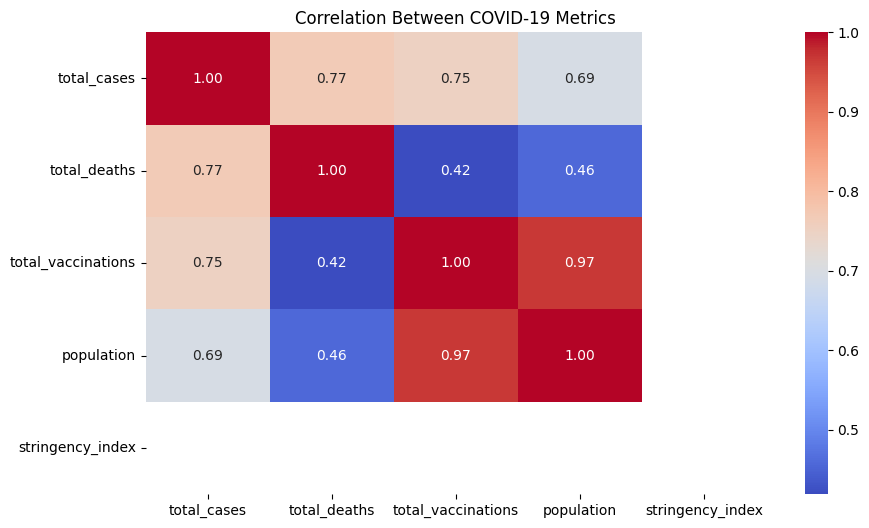

In [61]:


plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Between COVID-19 Metrics")
plt.show()


## Insights & Reporting

Here's a summary of key findings and interesting patterns from the COVID-19 data analysis:

### Key Insights:

1.  **Global Case and Death Trends:** The global trend shows distinct waves of new cases, with major peaks observed in late 2021/early 2022 and early 2023. Daily new deaths generally followed the case trends but with less pronounced peaks.
2.  **Top Countries by Total Cases:** The United States, China, and India consistently rank as the top countries with the highest total number of reported COVID-19 cases.
3.  **Vaccination Distribution:** While countries like China and India have the highest total number of vaccinations due to large populations, smaller nations like Cuba and Gibraltar show remarkably high vaccination percentages relative to their population size. This suggests different vaccination strategies or reporting methods.
4.  **Correlation between Metrics:** There is a strong positive correlation between `total_cases`, `total_deaths`, and `total_vaccinations` with `population`, indicating that more populous countries tend to have higher absolute numbers for these metrics. There is also a moderate positive correlation between `total_cases` and `total_deaths`, as expected.

### Anomalies and Interesting Patterns:

*   **Future Dates:** The data appears to contain entries with dates in the future (e.g., 2025). This is likely a data collection or entry anomaly and should be noted when interpreting the latest figures.
*   **High Vaccination Percentages:** Some countries exhibit vaccination percentages exceeding 100% or even 300%. This could be due to reporting methods that count total doses administered rather than fully vaccinated individuals, inclusion of booster shots, or data inconsistencies.
*   **Missing Stringency Index Data:** The `stringency_index` column has a significant number of missing values, limiting its use in the correlation analysis and broader trend analysis.
*   **Zero Values for Cumulative Metrics:** For some countries, the cumulative metrics (`total_cases`, `total_deaths`, `total_vaccinations`) show zero values for extended periods at the beginning of the pandemic, which might indicate delayed reporting or the actual start of the pandemic in those regions.